In [35]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import random

In [45]:
class  TrafficSimulation:
    
    def __init__(self, road_length=100, traffic_density=0.03, maximum_velocity=5, prob_slowing=0.3):
        
        self.road_length = road_length
        #self.state = sp.zeros((road_length, road_length))
        self.maximum_velocity=maximum_velocity
        self.traffic_density=traffic_density
        self.prob_slowing=prob_slowing
        self.count_flow=0
        self.time=0
    

        #filling the states with -1 empty cells
        #self.current_state.fill(self.empty)
        #self.next_state.fill(self.empty)
        
        # Place random cars with the requested density
        random_indexes = np.random.choice(
            range(self.road_length),
            size=int(round(traffic_density * self.road_length)),
            replace=False)
        self.current_state = -np.ones(self.road_length, dtype=int)  # -1 means empty cell
        self.current_state[random_indexes] = np.random.randint(
            0, self.maximum_velocity + 1, size=len(random_indexes))
        
        
    def update(self, display=True):
        distance=0
        new_state = -np.ones(self.road_length, dtype=int)
        
#         if self.current_state[-1] != -1:
#             self.count=+1
#         if self.current_state[0] != -1:
#             self.count=+1
        
        #updating the car_flow
        for k in range(-1 * self.maximum_velocity, 0):   #check last 5 slots
                if self.current_state[k] >= abs(k):               #count if car will move outside lane
                    self.count_flow += 1
        self.time += 1
        

                # Update car velocities.
        for i in range(self.road_length):
            if self.current_state[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.current_state[(i + distance) % self.road_length] == -1:
                    distance += 1
                # Acceleration
                if self.current_state[i] < self.maximum_velocity:
                    self.current_state[i] += 1
                # Deceleration
                if self.current_state[i] >= distance:
                    self.current_state[i] = distance - 1
                # Randomization
                if (self.current_state[i] > 0) and (np.random.uniform() < self.prob_slowing):
                    self.current_state[i] -= 1
        
         
        #Moving Cars                     
        for i in range(self.road_length):
            if self.current_state[i] != -1:
                new_state[(i + self.current_state[i]) % self.road_length] = self.current_state[i]
        self.current_state = new_state

            
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.current_state))

In [37]:
#Figure-1
model=TrafficSimulation(
    road_length=100, traffic_density=0.03, prob_slowing=0.3)

for i in range(50):
    model.update()
    model.display()

...................................2......2...................................1.....................
......................................3......3..................................2...................
..........................................4.....3..................................3................
...............................................5....4..................................4............
..................................................3......5..................................5.......
.....................................................3........5..................................5..
.4......................................................3..........5................................
......5....................................................3............5...........................
...........5...................................................4.............5......................
................5...................................................5.............5........

In [38]:
#Figure-2
model2 = TrafficSimulation(
    road_length=100, traffic_density=0.1, prob_slowing=0.5)

for i in range(50):
    model2.update()
    model2.display()

......1.............4.......................4..................5......2.........4.........20.1.1....
.......1................4.......................4..................4.....3...........5....00.0..1...
.........2..................4.......................4...................5....4...........400.0...1..
...........2.....................5.......................5..................4.....5......000..1....2
..3...........3.......................5.......................5..................5.....5.000...1....
.....3...........3........................4.......................4...................5.1000....1...
........3............4........................4.......................4................10000......2.
2...........4............4.........................5.......................5...........0000.1.......
..2.............4............4.........................4........................5......000.1..2.....
....2................5...........4.........................4.........................5.000.

In [47]:
#PCW 4.2
#Running a simulation of different density rates and 
#counting the corresponding flow rate for each of them
carcount=0
traffic_flow=[]
density=[]
for i in range(0, 80,2):
    sim=TrafficSimulation(
    road_length=100, traffic_density=i*0.01, prob_slowing=0.5)
    density.append(i*0.01)
    for j in range(200):
        sim.update()
    traffic_flow.append(sim.count_flow/200)
    
print(traffic_flow)

[0.0, 0.105, 0.18, 0.26, 0.34, 0.42, 0.275, 0.35, 0.31, 0.36, 0.305, 0.35, 0.33, 0.245, 0.315, 0.285, 0.31, 0.32, 0.27, 0.24, 0.25, 0.215, 0.23, 0.21, 0.205, 0.22, 0.19, 0.19, 0.195, 0.215, 0.19, 0.175, 0.175, 0.15, 0.155, 0.125, 0.11, 0.125, 0.11, 0.105]


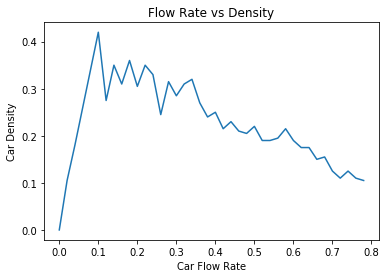

In [49]:
#Plot flow vs density
plt.xlabel('Car Flow Rate')
plt.ylabel('Car Density')
plt.title('Flow Rate vs Density')
plt.plot(density,traffic_flow)